# Computational Biology

## Evolution
We will simulate the evolution of a colony of Bacteria following the following rules:

(1) Each individual Batretia is optimaly adapted to live in an environment with PH=PHx
(2) When reproducing (copy itself into two copies), the PHx of the next generation slightly changes +/- compared to the original PHx. This happens every generation.
(3) The chance for Bacteria(i) to reproduce depends on two parameters: (i) It has best chances to reproduce if it's PHx is the same as the PH in the environment it lives in. and (ii) The more Bacterias are in the colony, the less chance each Batretia has to reproduce.

Following is a simulation showing how the colony evolve as a function of time and vatiations in PH and Colony size in time.

In [1]:
#!pip install gensim
!pip install numpy
!pip install matplotlib

import numpy
#import gensim.downloader as api
#import matplotlib.pyplot as plt
# wv = api.load('word2vec-google-news-300')
print("Done")

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Done



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## 1. How Bacteria colony adapts to new environment

We start with an initial colony of Bacterias with preset paramets of: Colony size, PH of the individuals in it, the PH of the Environment.

Then we look how it evolves generation by generation



Population size: 500
Average PH: 5.005221576562326
Outside PH: 4.0
Finished calculationg the simulation, here are the results:


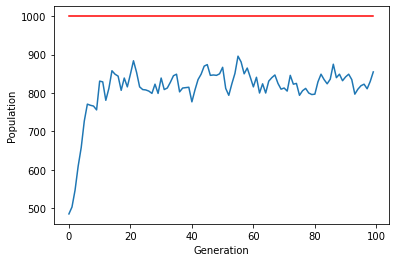

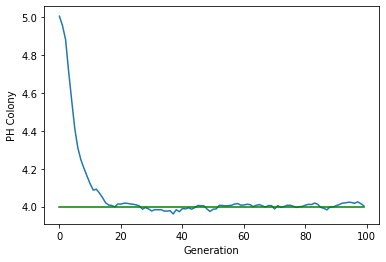

In [5]:
import math
import random
import numpy as np
from matplotlib import pyplot as plot


DemoMode = False
DebugMode = False


# Initial conditions

N = 500                   # Population size
Max_Population = 1000    # When is "too much" bacteria in the colony?
PH_Env = 4.0             # External (Environment) PH
PH0_bacteria = 5.0
Variance = 0.25           # The variance in PHx between Bacteria in the colony (if =0, all like same PH)
Simulation_time = 100     # How many generations we will simulate


Generations = range(0,Simulation_time)

# Create a population of N becteria in the colony with individual PHx

Population = []
PopulationSize = []
Average_bacteri_PH = []

for i in range(0,N):
    PHx = PH0_bacteria + (random.random()*2-1)*Variance*2
    Population.append(PHx)
    
print(f'Population size: {len(Population)}\nAverage PH: {np.mean(Population)}\nOutside PH: {PH_Env}')


# Start evolution generation by generation

for Generation in Generations:
        
    if DebugMode:
        print(f'Generation={Generation}, N = {N} Population Size = {len(Population)}')
    
    for x in Population:

        bacteri_PH = x

        Survive_PH = False
        if np.abs(PH_Env-bacteri_PH)<Variance:
            Survive_PH = True
        elif random.randint(1,2)==2:
            Survive_PH = True

        Survive_pop = False
        if len(Population)>=Max_Population:
            Survive_pop = False
        elif random.randint(1,len(Population))<Max_Population/2:
            Survive_pop = True

        if Survive_PH and Survive_pop:
            # This bacretia reproduce in this generation
            # Choosw 2 new PH for the 2 outcomes
            PH_1 = bacteri_PH+(random.random()*2-1)*Variance
            PH_2 = bacteri_PH+(random.random()*2-1)*Variance
                
            Population.append(PH_1)
            Population.append(PH_2)

        Population.remove(bacteri_PH)  # delete the old bacteria after it did - or did not - reproduce

    
    # The whole colony was regenerated - Now we register few averages

    PopulationSize.append(len(Population))
    Average_bacteri_PH.append(np.mean(Population))

    if DebugMode:
        print(f'PopulationSize = {len(Population)}')
        print(f'Average_bacteri_PH = {np.mean(Population)}')

        
print('Finished calculationg the simulation, here are the results:')

plot.plot(Generations,PopulationSize)
plot.plot(Generations,Max_Population*np.ones(len(Generations)),"r-")
plot.xlabel("Generation")
plot.ylabel("Population")
plot.show()

plot.plot(Generations,Average_bacteri_PH)
plot.plot(Generations,PH_Env*np.ones(len(Generations)),"g-")
plot.xlabel("Generation")
plot.ylabel("PH Colony")
plot.show()




## 2. How Bacteria colony adapts to a changing environment

This time the PH of the environment is slowly changing over time, going up and then down and up again. And we see how the Bacteria colony adapts to the changing condition throuth the selection of the most fit each generation


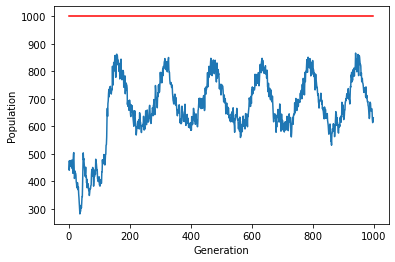

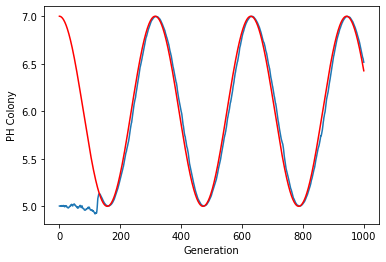

Finished simulation


In [35]:
#import math
import random
import numpy as np
from matplotlib import pyplot as plot



DemoMode = True
DebugMode = False


# Initial conditions

N = 500                   # Population size
Max_Population = 1000     # When is "too much" bacteria in the colony?

PH0_bacteria = 5.0
Variance = 0.025           # The variance in PHx between Bacteria in the colony (if =0, all like same PH)
Simulation_time = 1000       # How many generations we will simulate

Generations = range(0,Simulation_time)
PHOverTime =  np.cos(np.float32(Generations)/N*10)    # Set the Changing PH of the Environment
PHOverTime = PHOverTime + 6.0

# Runs the simulation with different levels of adaptation for the Bacteria Colony
# (Variance determines ths adaptation to change, the higher variance is, the more adaptable the colony)


# Create a population of N becteria in the colony with individual PHx

Population = []
PopulationSize = []
Average_bacteri_PH = []

for i in range(0,N):
    PHx = PH0_bacteria + (random.random()*2-1)*Variance*2
    Population.append(PHx)

if DebugMode:
    print(f'Population size: {len(Population)}\nColony Variance: {ColonyVariance}')

# Start evolution generation by generation

for Generation in Generations:

    PH_Env = PHOverTime[Generation]

    for x in Population:

        bacteri_PH = x

        Survive_PH = False
        if np.abs(PH_Env-bacteri_PH)<Variance:
            Survive_PH = True
        elif random.randint(1,2)==2:
            Survive_PH = True

        Survive_pop = False
        if len(Population)>=Max_Population:
            Survive_pop = False
        elif random.randint(1,len(Population))<Max_Population/2:
            Survive_pop = True

        if Survive_PH and Survive_pop:
            # This bacretia reproduce in this generation
            # Choosw 2 new PH for the 2 outcomes
            PH_1 = bacteri_PH+(random.random()*2-1)*Variance
            PH_2 = bacteri_PH+(random.random()*2-1)*Variance

            Population.append(PH_1)
            Population.append(PH_2)

        Population.remove(bacteri_PH)  # delete the old bacteria after it did - or did not - reproduce


    # The whole colony was regenerated - Now we register few averages

    PopulationSize.append(len(Population))
    Average_bacteri_PH.append(np.mean(Population))

if DebugMode:
    print(f'PopulationSize = {len(Population)}')
    print(f'Average_bacteri_PH = {np.mean(Population)}')
    print(f'Colony Variance = {Variance}')


plot.plot(Generations,PopulationSize)
plot.plot(Generations,Max_Population*np.ones(len(Generations)),"r-")
plot.xlabel("Generation")
plot.ylabel("Population")
plot.show()

plot.plot(Generations,Average_bacteri_PH)
plot.plot(Generations,PHOverTime,"r-")
plot.xlabel("Generation")
plot.ylabel("PH Colony")
plot.show()


print('Finished simulation')




## 3. How Bacteria colonies with different levels of adaptation adapts to a changing environment

This time the PH of the environment is slowly changing over time, *AND* we test the Bacteria Colony evolution with few different levels of adaptation to the environment determined by the Variance we allow for new generations to have from the previous generation

Run simulation with Colony Variance = 0.01


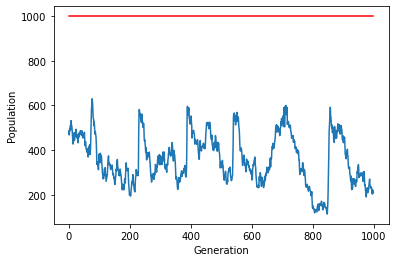

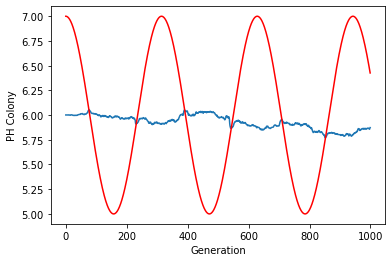

Run simulation with Colony Variance = 0.015


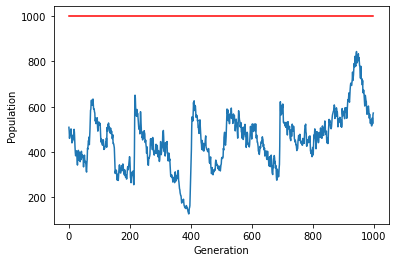

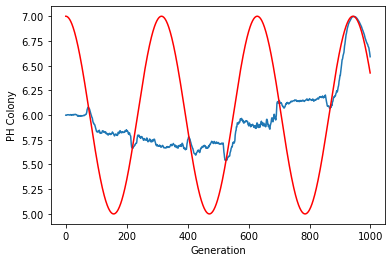

Run simulation with Colony Variance = 0.03


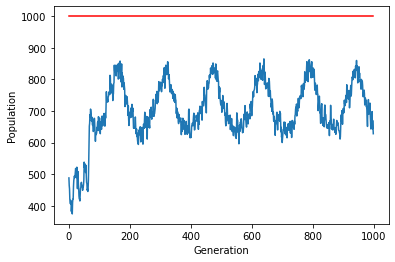

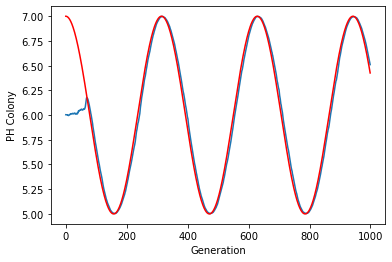

Finished simulation


In [44]:
#import math
import random
import numpy as np
from matplotlib import pyplot as plot



DemoMode = True
DebugMode = False


# Initial conditions

N = 500                   # Population size
Max_Population = 1000     # When is "too much" bacteria in the colony?

PH0_bacteria = 6.0
# Variance = 0.025           # The variance in PHx between Bacteria in the colony (if =0, all like same PH)
Simulation_time = 1000       # How many generations we will simulate

Generations = range(0,Simulation_time)
PHOverTime =  np.cos(np.float32(Generations)/N*10)    # Set the Changing PH of the Environment
PHOverTime = PHOverTime + 6.0

# Runs the simulation with different levels of adaptation for the Bacteria Colony
# (Variance determines ths adaptation to change, the higher variance is, the more adaptable the colony)

ColonyVariance = [ 0.01 , 0.015 , 0.03]

for Variance in ColonyVariance:
    
    print(f'Run simulation with Colony Variance = {Variance}')

    # Create a population of N becteria in the colony with individual PHx

    Population = []
    PopulationSize = []
    Average_bacteri_PH = []

    for i in range(0,N):
        PHx = PH0_bacteria + (random.random()*2-1)*Variance*2
        Population.append(PHx)

    if DebugMode:
        print(f'Population size: {len(Population)}\nColony Variance: {ColonyVariance}')

    # Start evolution generation by generation

    for Generation in Generations:

        PH_Env = PHOverTime[Generation]

        for x in Population:

            bacteri_PH = x

            Survive_PH = False
            if np.abs(PH_Env-bacteri_PH)<Variance:
                Survive_PH = True
            elif random.randint(1,2)==2:
                Survive_PH = True

            Survive_pop = False
            if len(Population)>=Max_Population:
                Survive_pop = False
            elif random.randint(1,len(Population))<Max_Population/2:
                Survive_pop = True

            if Survive_PH and Survive_pop:
                # This bacretia reproduce in this generation
                # Choosw 2 new PH for the 2 outcomes
                PH_1 = bacteri_PH+(random.random()*2-1)*Variance
                PH_2 = bacteri_PH+(random.random()*2-1)*Variance

                Population.append(PH_1)
                Population.append(PH_2)

            Population.remove(bacteri_PH)  # delete the old bacteria after it did - or did not - reproduce


        # The whole colony was regenerated - Now we register few averages

        PopulationSize.append(len(Population))
        Average_bacteri_PH.append(np.mean(Population))

    if DebugMode:
        print(f'PopulationSize = {len(Population)}')
        print(f'Average_bacteri_PH = {np.mean(Population)}')
        print(f'Colony Variance = {Variance}')
        
        
    plot.plot(Generations,PopulationSize)
    plot.plot(Generations,Max_Population*np.ones(len(Generations)),"r-")
    plot.xlabel("Generation")
    plot.ylabel("Population")
    plot.show()

    plot.plot(Generations,Average_bacteri_PH)
    plot.plot(Generations,PHOverTime,"r-")
    plot.xlabel("Generation")
    plot.ylabel("PH Colony")
    plot.show()
        
        
print('Finished simulation')


